<a href="https://colab.research.google.com/github/kumbieny/kumbieny/blob/main/TF_Linear_regression(Moore's_law_proof)_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tensorflow==2.9.1
import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 511.7 MB 5.8 kB/s 
     |████████████████████████████████| 1.6 MB 51.8 MB/s 
     |████████████████████████████████| 438 kB 77.6 MB/s 
     |████████████████████████████████| 5.8 MB 49.6 MB/s 
2.9.1


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2022-07-18 07:59:17--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2022-07-18 07:59:17 (24.3 MB/s) - ‘moore.csv’ saved [2302/2302]



In [4]:
data = pd.read_csv('moore.csv', header=None).values
x=data[:,0].reshape(-1, 1)
y=data[:,1]

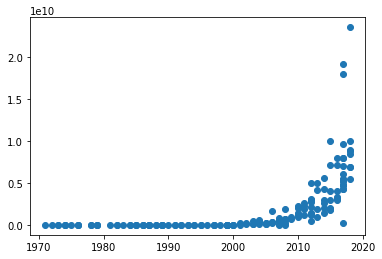

In [5]:
#plot the data
plt.scatter(x, y)

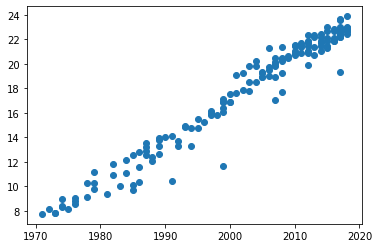

In [6]:
y = np.log(y)
plt.scatter(x, y)

In [7]:
#centering of x data so that the values are not too large
#we could scale it too and then reverse the transformation later
x = x- x.mean()

In [8]:
from numpy.ma.core import shape
#Now to create a tensorflow model
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(1,)),
  tf.keras.layers.Dense(1)
  ])
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

#learning rate scheduler
def  schedule(epoch, Ir):
  if epoch >=50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

#train the model
r=model.fit(x, y, epochs = 200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 4ms/step - loss: 327.7020 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 4ms/step - loss: 413.7022 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 4ms/step - loss: 489.5089 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 4ms/step - loss: 332.6958 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 283.0470 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 4ms/step - loss: 248.4024 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 234.3941 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 4ms/step - loss: 204.7423 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 114.5056 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 4ms/step - loss: 74.8274 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 4ms/step - loss

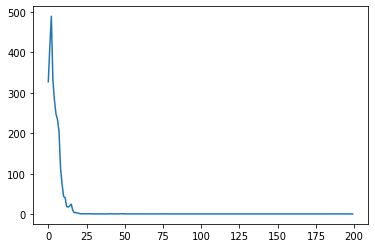

In [9]:
#plot
plt.plot(r.history['loss'], label='loss')

In [10]:
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.33767673]], dtype=float32), array([17.757114], dtype=float32)]


In [11]:
#The slope of line is:
a= model.layers[0].get_weights()[0][0,0]

In [12]:
print("Time to double:", np.log(2) / a)

Time to double: 2.0526945191006516


In [13]:
x = np. array(x).flatten()
y = np.array(y)
denominator = x.dot(x)-x.mean()*x.sum()
a = (x.dot(y)-y.mean()*x.sum())/denominator
b=(y.mean()*x.dot(x)-x.mean()*x.dot(y))/denominator
print(a, b)
print("Time to double:", np.log(2)/a)

0.341682487387313 17.764939393631764
Time to double: 2.0286295205239204


Part 2: Making predictions

6/6 [==============================] - 0s 3ms/step


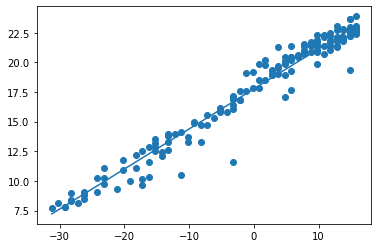

In [14]:
# makesure our line fits the data
yhat=model.predict(x).flatten()
plt.scatter(x, y)
plt.plot(x,yhat)

In [15]:
#Manual calculation
#get the weights
w,b = model.layers[0].get_weights()
#reshape x because we flattened it again earlier
x=x.reshape(-1,1)
#(N*1)*(1*1)+(1)-->(N*1)
yhat2 = (x.dot(w) + b).flatten()
#don't use == for floating points
np.allclose(yhat, yhat2)


True